GitHub: https://github.com/itsharman/Introduction-to-Machine-Learning-Supervised-Learning-Final-Project
## Problem Description

In this project, my goal is to develop a machine learning model that can predict whether a patient has heart disease based on various medical attributes. Early and accurate prediction can significantly impact patient care by enabling timely interventions.

## Importing Python libraries

Please see README.md for accurate description

### Data Manipulation:

- Pandas and numpy are essential for data handling and numerical computations.

###  Visualization:

- matplotlib.pyplot and seaborn are used for creating visualizations to explore and understand the data.

### Machine Learning:

- sklearn.model_selection provides tools for splitting the dataset and tuning models.
- StandardScaler from sklearn.preprocessing is used for feature scaling.
- sklearn.metrics offers functions to evaluate model performance.
- Machine learning models imported include Logistic Regression, Random Forest Classifier, and Support Vector Classifier.

### Handling Imbalanced Data:

- SMOTE (Synthetic Minority Over-sampling Technique) from imblearn.over_sampling is used to address class imbalance in the dataset.

In [56]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Handling imbalanced data
from imblearn.over_sampling import SMOTE


## Data description and load

The dataset I used comes from UC Irvine available here: [Heart Disease - UC Irvine](https://archive.ics.uci.edu/dataset/45/heart+disease)

Size: ~125.9KB

"This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  In particular, the Cleveland database is the only one that has been used by ML researchers to date.  The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0). " [[1]](#1)

### Loading Data:

- The dataset is loaded into a pandas DataFrame using pd.read_csv().
- This allows us to work with the data in a structured format suitable for analysis.

### Previewing Data:

- data.head() displays the first five rows, giving an initial glimpse into the dataset's structure and contents.

In [57]:
# Load the dataset
data = pd.read_csv('../data/heart.csv') 

# Display the first five rows (0 based index)
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## EDA (Exploratory Data Analysis)

### Dataset Dimensions:

- data.shape provides the number of rows and columns, which helps in understanding the dataset's size.

### Missing Values:

- data.isnull().sum() checks for missing values in each column.
- Identifying missing values is crucial as they can affect analysis and model performance.

### Data Types and Memory Usage:

- data.info() displays the data types of each column and memory usage.
- Knowing data types is important for processing and ensuring that operations on the data are appropriate.

In [58]:
# Check the shape of the data
print(f'Dataset has {data.shape[0]} rows and {data.shape[1]} columns.')

# Check for missing values
print(data.isnull().sum())

# Data types
data.info()

Dataset has 1025 rows and 14 columns.
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), in

### Statistical Metrics:

data.describe() provides statistical measures like mean, standard deviation, minimum, and maximum values for numerical columns.
This helps in understanding the distribution and range of the data.

In [59]:
# Statistical summary
data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Visualizing Class Distribution:

A count plot shows how many instances belong to each class (presence or absence of heart disease).
Assessing class balance is important because imbalanced datasets may require special handling during model training.

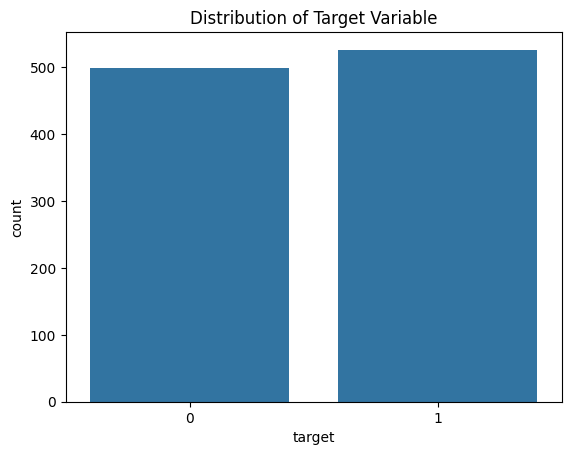

In [60]:
# Plot the distribution of the target variable
sns.countplot(x='target', data=data)
plt.title('Distribution of Target Variable')
plt.show()

### Correlation Analysis:

The correlation matrix shows the linear relationships between pairs of features.
A heatmap visualizes these correlations, making it easier to identify highly correlated features.

### Identifying Multicollinearity:

Features that are highly correlated may cause issues like multicollinearity, which can affect certain models and interpretations.

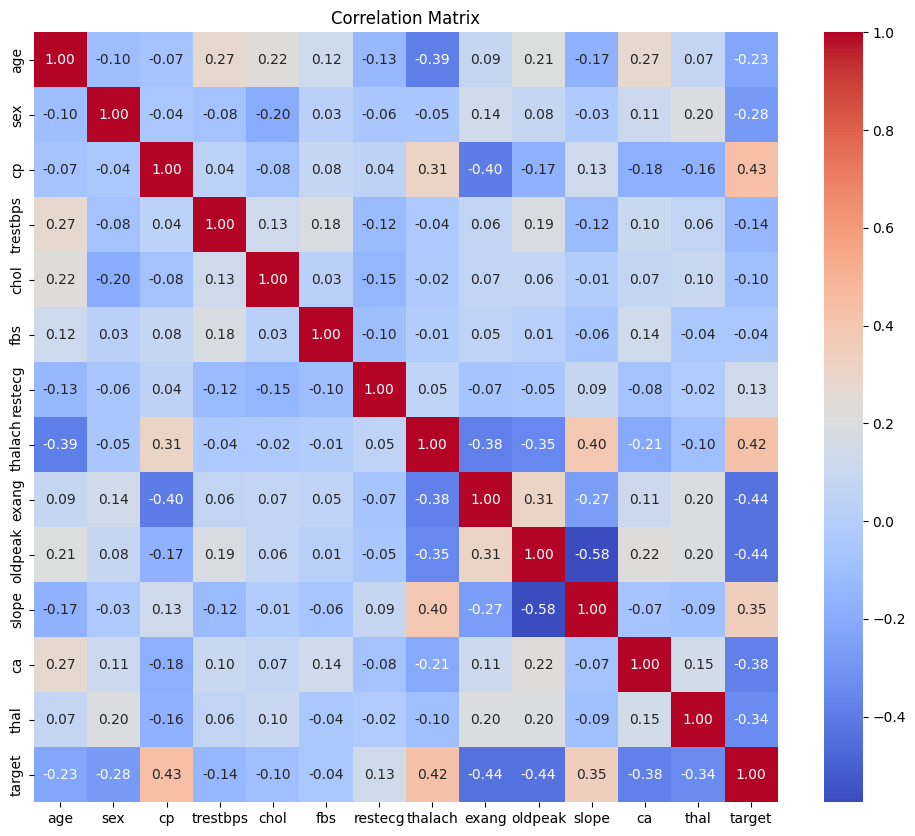

In [61]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Visualizing Relationships:

A pairplot shows pairwise relationships between features, colored by the target variable.
It helps in identifying patterns or clusters that may distinguish between classes.

### Feature Selection:

Observing these relationships aids in selecting features that are most informative for predicting the target.

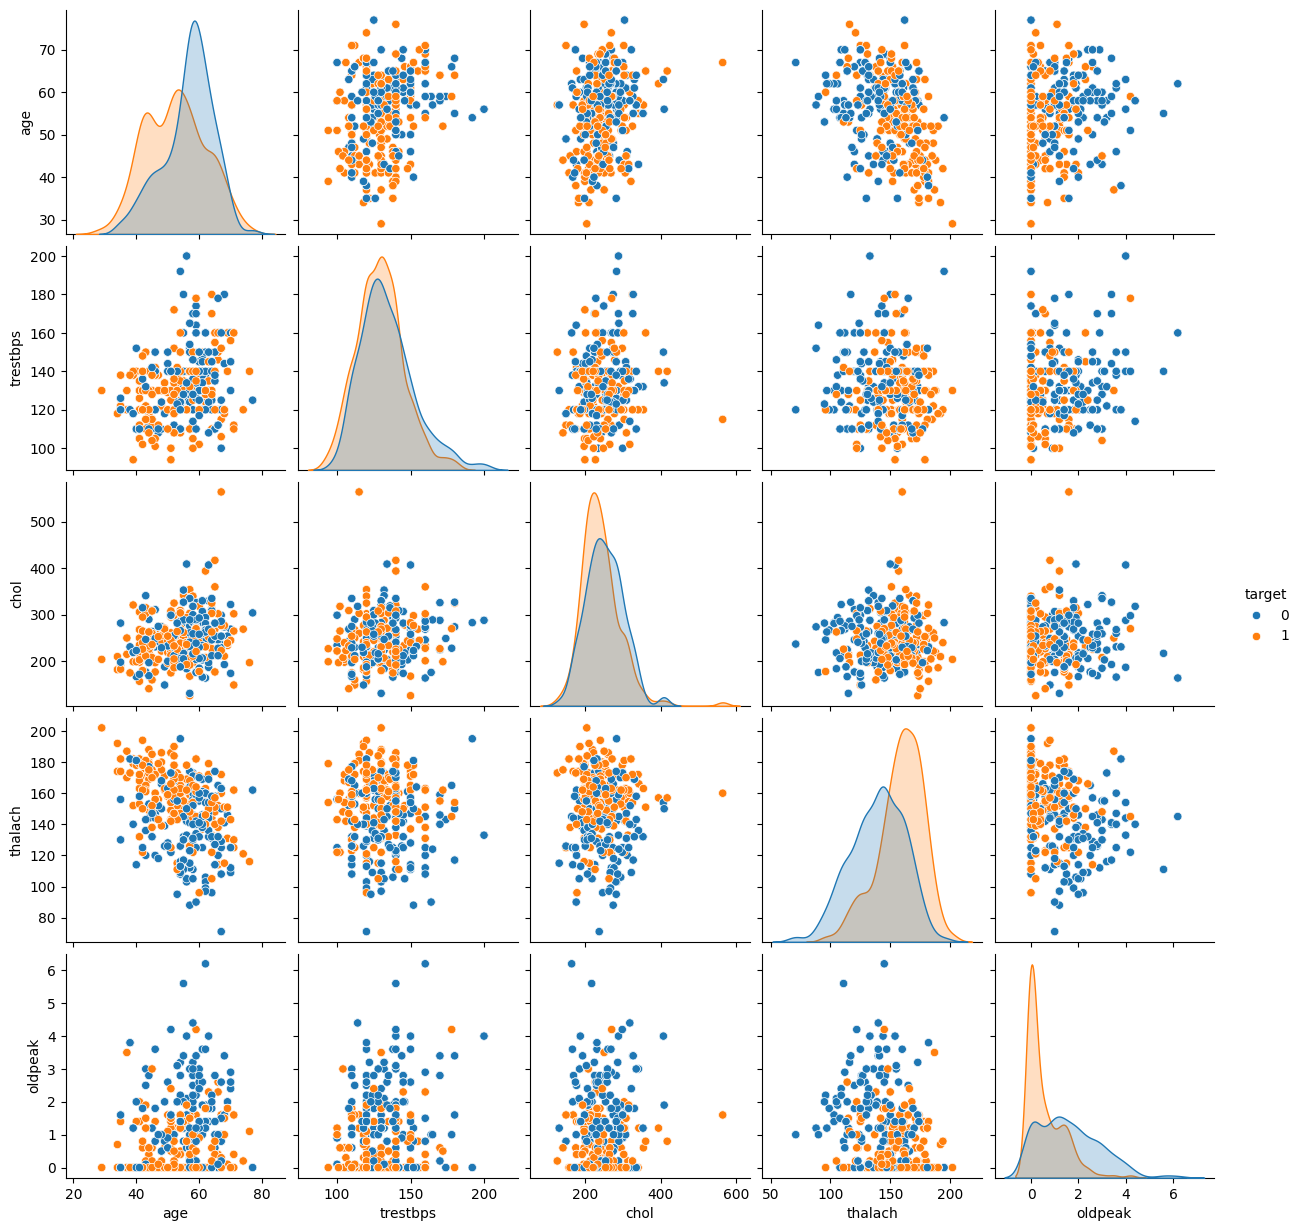

In [62]:
# Pairplot
sns.pairplot(data, vars=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], hue='target')
plt.show()


## Data Preprocessing

### Identifying Categorical Features:

Features like 'cp' (chest pain type), 'restecg' (resting ECG results), etc., are categorical and need to be converted into numerical format for modeling.

### One-Hot Encoding:

pd.get_dummies() converts categorical variables into binary (0/1) variables, creating new columns for each category.
drop_first=True avoids the dummy variable trap by dropping the first category to prevent multicollinearity.

In [63]:
# List of categorical variables
categorical_features = ['cp', 'restecg', 'slope', 'thal', 'ca']

# One-hot encoding
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)


### Feature Scaling

Why Scale Features:
Many machine learning algorithms perform better when numerical features are on a similar scale.
Features like 'trestbps' (resting blood pressure) and 'chol' (serum cholesterol) may have different units and scales.

Standardization:
StandardScaler standardizes features by removing the mean and scaling to unit variance.
This results in a mean of 0 and a standard deviation of 1 for each feature.

In [64]:
# Features to scale
features_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])


### Assessing Class Imbalance:

Before modeling, it's important to check if the classes are balanced.
Imbalanced classes can bias the model towards the majority class.
Separating Features and Target:
X contains the input features, and y contains the target variable.

### Applying SMOTE:

SMOTE generates synthetic samples of the minority class to balance the dataset.
This helps the model learn from both classes equally.

### Verifying Resampling:

After resampling, we check the new class distribution to confirm that the dataset is balanced.

In [65]:
# Check class distribution
data['target'].value_counts()

# Separate input features and target
X = data.drop('target', axis=1)
y = data['target']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
print(y_resampled.value_counts())


target
0    526
1    526
Name: count, dtype: int64


## Model Building

### Train-Test Split

Splitting the data into training and testing sets allows us to evaluate the model's performance on unseen data.

Parameters:
- test_size=0.2 allocates 20% of the data for testing.
- random_state=42 ensures reproducibility.
- stratify=y_resampled maintains the class distribution in both training and testing sets.

In [66]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


### Logistic Regression

- Model Selection:
Logistic Regression is a simple yet effective baseline model for classification problems.
- Initialization:
max_iter=1000 increases the maximum number of iterations to ensure convergence.
- Training:
The model is trained on the training data using fit().
- Prediction:
predict() generates predictions on the test data.

In [67]:
# Initialize the model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test)


### Random Forest Classifier

- Model Selection:
Random Forest is an ensemble method that combines multiple decision trees to improve predictive accuracy and control overfitting.
- Initialization:
random_state=42 ensures reproducibility.
- Training and Prediction:
Similar to Logistic Regression, we train the model and make predictions.

In [68]:
# Initialize the model
rf_clf = RandomForestClassifier(random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test)


### Support Vector Machine

- Model Selection:
Support Vector Machine (SVM) is effective in high-dimensional spaces and when the number of features is greater than the number of samples.
- Parameters:
probability=True enables probability estimates, which are needed for ROC curves.
random_state=42 for reproducibility.
- Training and Prediction:
Train the model and make predictions on the test set.

In [69]:
# Initialize the model
svm_clf = SVC(probability=True, random_state=42)

# Train the model
svm_clf.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_clf.predict(X_test)


## Model Evaluation

### Evaluation Metrics Function

- Purpose:
Creating a function to evaluate models ensures consistency and reduces code repetition.
- Metrics Used:
Accuracy: The proportion of correct predictions.
- Classification Report: Provides precision, recall, F1-score, and support for each class.
- Parameters:
y_test: True labels.
y_pred: Predicted labels.
model_name: A string to identify the model in the output.

In [70]:
def evaluate_model(y_test, y_pred, model_name):
    print(f'--- {model_name} ---')
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))


### Evaluating the three models

### Logistic Regression Evaluation

In [71]:
evaluate_model(y_test, y_pred_lr, 'Logistic Regression')

--- Logistic Regression ---
Accuracy: 0.8672985781990521
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87       106
           1       0.85      0.89      0.87       105

    accuracy                           0.87       211
   macro avg       0.87      0.87      0.87       211
weighted avg       0.87      0.87      0.87       211



### Random Forest Evaluation

In [72]:
evaluate_model(y_test, y_pred_rf, 'Random Forest')


--- Random Forest ---
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       105

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



### SVM Evaluation

In [73]:
evaluate_model(y_test, y_pred_svm, 'Support Vector Machine')


--- Support Vector Machine ---
Accuracy: 0.957345971563981
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       106
           1       0.95      0.96      0.96       105

    accuracy                           0.96       211
   macro avg       0.96      0.96      0.96       211
weighted avg       0.96      0.96      0.96       211



### ROC Curves

The Receiver Operating Characteristic (ROC) curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.
It helps evaluate the trade-off between sensitivity and specificity.

### AUC (Area Under the Curve):

The AUC summarizes the ROC curve into a single value.
A higher AUC indicates better model performance.

### Plotting Multiple Models:

By plotting ROC curves for all models on the same graph, we can visually compare their performance.

### Probability Estimates:

predict_proba() provides probability estimates needed for ROC curves.
For SVM, probability=True must be set during initialization to use predict_proba().

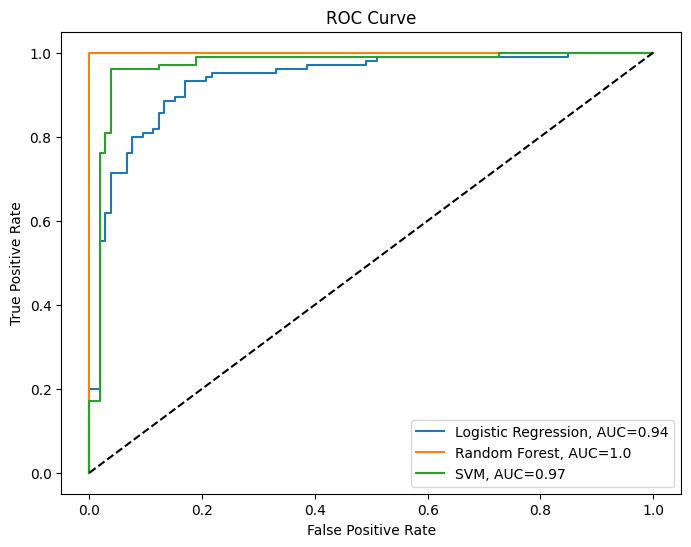

In [74]:
# Plot ROC Curve
plt.figure(figsize=(8,6))

# Logistic Regression
y_pred_proba_lr = log_reg.predict_proba(X_test)[::,1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression, AUC="+str(round(auc_lr,2)))

# Random Forest
y_pred_proba_rf = rf_clf.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label="Random Forest, AUC="+str(round(auc_rf,2)))

# SVM
y_pred_proba_svm = svm_clf.predict_proba(X_test)[::,1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)
auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, label="SVM, AUC="+str(round(auc_svm,2)))

# Plot settings
plt.plot([0,1],[0,1],'k--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Hyperparameter Tuning (Random Forest)

Adjusting hyperparameters can improve model performance by finding the optimal settings.

### Parameter Grid:

We define a grid of parameters (param_grid) to search over.
- n_estimators: Number of trees in the forest.
- max_depth: Maximum depth of the tree.
- min_samples_split: Minimum number of samples required to split an internal node.

### Grid Search:

GridSearchCV exhaustively searches over specified parameter values.
- cv=5: Uses 5-fold cross-validation to evaluate each combination.
- scoring='accuracy': Optimization criterion.
- n_jobs=-1: Utilizes all available CPU cores for parallel processing.

### Training:

The grid search fits multiple models to find the best hyperparameters.

### Results:
grid_search.best_params_ outputs the best combination found.
The best estimator (best_rf) is used to make predictions and evaluate performance.

In [75]:
# Parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10]
}

# Grid Search
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print('Best parameters found:', grid_search.best_params_)

# Best estimator
best_rf = grid_search.best_estimator_

# Predictions with best model
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate
evaluate_model(y_test, y_pred_best_rf, 'Optimized Random Forest')


Best parameters found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
--- Optimized Random Forest ---
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       105

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



## Feature Importance

Feature importance helps in interpreting the model by showing which features contribute most to the predictions.

- Extracting Importances:
best_rf.feature_importances_ provides the importance scores.
- Creating a DataFrame:
Organizing the features and their importance scores in a DataFrame makes it easier to manipulate and visualize.
- Sorting Features:
Sorting by importance highlights the most significant features.
- Visualization:
A bar plot allows us to visually assess the relative importance of each feature.
- Interpretation:
Identifying key features can provide insights into factors that are most associated with heart disease.

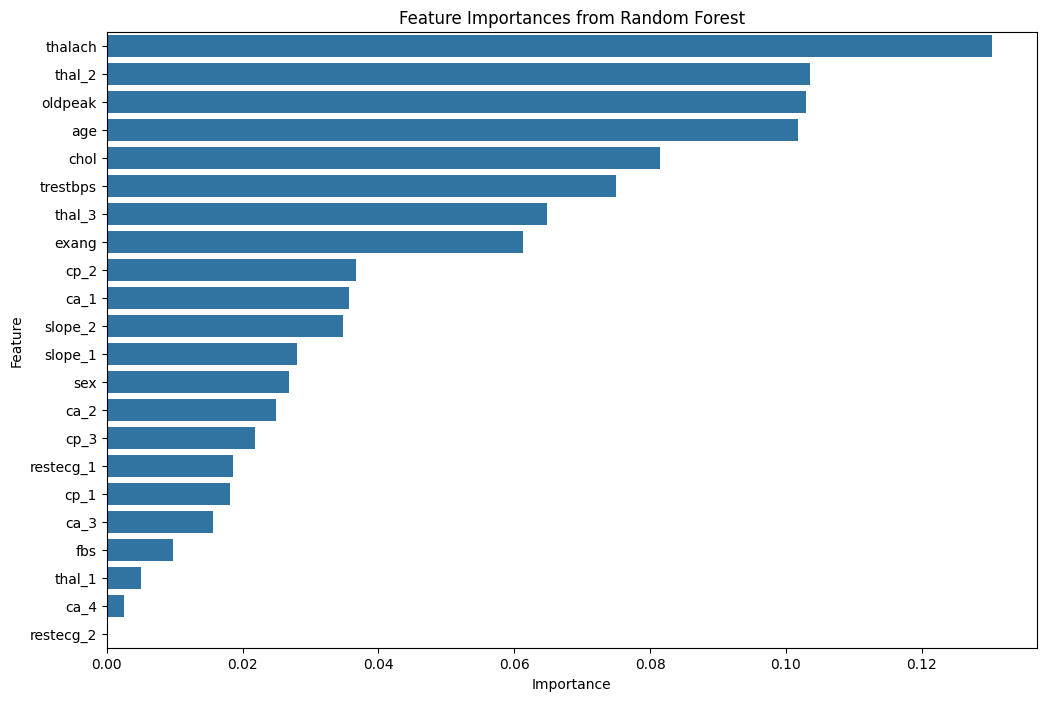

In [76]:
# Get feature importances
importances = best_rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest')
plt.show()


## Conclusions

In this project, I developed several machine learning models to predict heart disease using patient data. The Random Forest classifier, performed the best with the highest accuracy and AUC score. Key features influencing the prediction included 'cp' (chest pain type), 'thalach' (maximum heart rate achieved), and 'oldpeak' (ST depression induced by exercise).

## Future work

- Collect More Data:
Increasing the dataset size can improve model generalization.
- Explore Advanced Models:
Trying models like XGBoost or neural networks may yield better performance.
- Incorporate Additional Information:
Including more patient data (e.g., lifestyle factors) might enhance predictive power.